In [1]:
# Conventional way to import pandas
import pandas as pd
# Conventional way to import seaborn
import seaborn as sns
# Conventional way to import train_test_split that splits sets into training and testing sets
from sklearn.model_selection import train_test_split
# Conventional way to import numpy
import numpy as np
# Conventional way to import pyplot
import matplotlib.pyplot as plt
# Import r2 score
from sklearn.metrics import r2_score
# Import mean squared error to get prediction errors. How far data points are from the regression line. Lower is better. Used after r2 as it does not determine whether coefficient estimates and predictions are biased (checks if there are more data under the line and more data above the line which r2 score can't do) 
from sklearn.metrics import mean_squared_error
# Import ElasticNet model
from sklearn.linear_model import ElasticNet

# Allow plots to appear within the notebook
%matplotlib inline

In [2]:
# --- Importing datasets ---
# Save the Paths to CSV data
all_room_observation_path = r'C:\Users\deano\OneDrive\Documents\University_Courses\Year_Three\CSC3095_Dissertation\Datasets\CSV_Format\AllData\LastObservationOfCO2AndOccupants.csv'
all_room_observation_with_time_path = r'C:\Users\deano\OneDrive\Documents\University_Courses\Year_Three\CSC3095_Dissertation\Datasets\CSV_Format\AllData\LastObservationOfCO2AndOccupantsWithTime.csv'
all_room_window_observation = r'C:\Users\deano\OneDrive\Documents\University_Courses\Year_Three\CSC3095_Dissertation\Datasets\CSV_Format\AllData\WindowOfObservationsOfCO2AndOccupants.csv'

In [3]:
# Save a dictionary of all Paths to CSV files
observations = {'all_room': all_room_observation_path, 'all_room_with_time': all_room_observation_with_time_path, 'all_room_window_observation': all_room_window_observation}

In [4]:
# Read Observations CSV file directly from file path and save results
data_observations = pd.read_csv(observations['all_room_window_observation'])

In [5]:
# --- Data Exploration ---

# Display the first 5 rows of CSV file to verify it's the correct file
data_observations.head()

,Time20Mins,CO220Mins,Time10Mins,CO210Mins,Time,CO2,Occupants
0,0.45,680.96,0.46,752.64,0.47,773.76,2
1,0.73,516.16,0.74,517.84,0.74,515.84,6
2,0.57,540.80,0.58,580.80,0.58,652.80,2
3,0.70,520.80,0.71,516.40,0.72,515.44,14
4,0.51,462.86,0.52,464.32,0.53,465.32,11


In [6]:
# Display the last 5 rows
data_observations.tail()

,Time20Mins,CO220Mins,Time10Mins,CO210Mins,Time,CO2,Occupants
78,0.46,442.42,0.47,444.05,0.47,444.52,7
79,0.52,464.32,0.53,465.32,0.53,464.53,11
80,0.55,465.95,0.56,468.23,0.56,468.69,10
81,0.47,444.05,0.47,444.52,0.48,448.36,7
82,0.71,516.40,0.72,515.44,0.72,514.40,9


In [7]:
# Display the different datatypes available
data_observations.dtypes

Time20Mins    float64
CO220Mins     float64
Time10Mins    float64
CO210Mins     float64
Time          float64
CO2           float64
Occupants       int64
dtype: object

In [8]:
# Check the shape of the Dataframe (rows, columns)
data_observations.shape

(83, 7)

In [9]:
# --- Data Visualization ---

# Set the background colour of the plots to white
sns.set(style="whitegrid", color_codes=True)

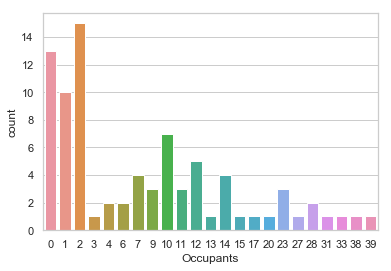

In [10]:
sns.countplot('Occupants', data=data_observations)

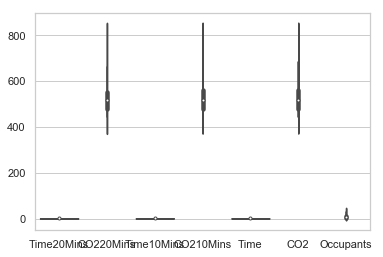

In [11]:
# Plots violin plot to see distribution of data
sns.violinplot(data=data_observations)

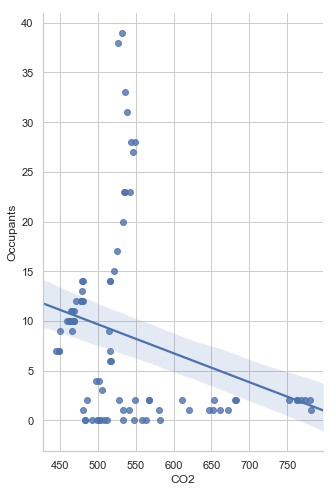

In [12]:
# Visualize the relationship between the features and the respose of last observations using scatterplots
sns.pairplot(data_observations, x_vars='CO2', y_vars='Occupants', height=7, aspect=0.7, kind='reg')

In [13]:
# --- Training and Testing sets ---

# Create a Python list of feature name
feature_cols = ['Time20Mins', 'CO220Mins', 'Time10Mins', 'CO210Mins', 'Time', 'CO2']

# Use the list to select a subset of the original Dataframe
X = data_observations[feature_cols]

# Print the first 5 rows
X.head()

,Time20Mins,CO220Mins,Time10Mins,CO210Mins,Time,CO2
0,0.45,680.96,0.46,752.64,0.47,773.76
1,0.73,516.16,0.74,517.84,0.74,515.84
2,0.57,540.80,0.58,580.80,0.58,652.80
3,0.70,520.80,0.71,516.40,0.72,515.44
4,0.51,462.86,0.52,464.32,0.53,465.32


In [14]:
# Checks the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(83, 6)


In [15]:
# Select a series from the DataFrame
y = data_observations['Occupants']

# Print the first 5 values
y.head()

0     2
1     6
2     2
3    14
4    11
Name: Occupants, dtype: int64

In [16]:
# Check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(83,)


In [17]:
# Creates training sets and testing sets
# Default is 75% for training and 25% for testing 
# Changed to 70% for training and 30% for testing due to low dataset size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [18]:
# Check the training and testing set shapes
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(58, 6)
(58,)
(25, 6)
(25,)


In [19]:
# --- Building Model ---

# Elastic Net
enet = ElasticNet(alpha=0.1, l1_ratio=0.1, random_state=0)

enet.fit(X_train, y_train)

y_pred_enet = enet.predict(X_test)

In [20]:
# --- Performance Comparison ---

# Elastic Net - r2 (higher is better)
enet.score(X_test, y_test)

0.11328198064682249

In [21]:
# Elastic Net - root mean squared error (predict bias, lower is better)
print(np.sqrt(mean_squared_error(y_test, y_pred_enet)))

7.279831305179383


In [22]:
# --- Prediction ---

Time20Mins = 0.583333333333333

CO220Mins = 495.431111111111

Time10Mins = 0.590277777777778

CO210Mins = 494.897777777777

Time = 0.597222222222222

roomCO2 = 495.111111111111

# Elastic Net
y_new_pred_enet = enet.predict([[Time20Mins, CO220Mins, Time10Mins, CO210Mins, Time, roomCO2]])


In [23]:
# --- Print Results ---

# Elastic Net
print("Elastic Net : Predicted = %d" % (y_new_pred_enet[0]))

Elastic Net : Predicted = 10
